In [38]:
import numpy as np
import random
import math
from collections import deque

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [39]:
m = 10 # number of locations, ranges from 1 ..... m
t = 24 # number of hours, ranges from 0 .... t-1
d = 30 # number of days, ranges from 0 ... d-1
episode_length = 10000
fixed_act_Set = 15
epsilon = 0.99
learning_rate = 0.01
batch_size = 50
gamma = 0.95
epsilon_min = 0
epsilon_decay = 0.9995
Time_matrix = np.random.randint(1, 11,(m, m))
actions = []
for i in range(m):
    for j in range(m):
        actions.append([i,j])
states = []
for i in range(m):
    for j in range(t):
        for k in range(d):
            states.append([i,j,k])

In [40]:
def state_trans(state,action,m,t,d):
    state_encod = np.zeros(m+t+d+m+m)
    state_encod.reshape(1,84)
    state_encod[current_state[0]] = 1
    state_encod[m+current_state[1]] = 1
    state_encod[m+t+current_state[2]] = 1
    state_encod[m+t+d+action[0]] = 1
    state_encod[m+t+d+m+action[1]] = 1
    return state_encod   

In [41]:
def act(Q_value,epsilon,actions):
    if np.random.rand() <= epsilon:
        index = np.random.randint(0, m*m,(1, 1))
        if actions[np.int(index)][0] == actions[np.int(index)][1] and actions[np.int(index)][1] != 0:
            return act(Q_value,epsilon,actions)
        else:
            return index
    else:
        index = np.argmax(Q_value)
        if actions[np.int(index)][0] == actions[np.int(index)][1] and actions[np.int(index)][1] != 0:
            return act(Q_value,epsilon,actions)
        else:
            return index

In [42]:
def reward_func(state, action, time_matrix):
    start_loc, time, day = state
    pickup, drop = action
    if pickup == 0 and drop == 0:
        return -1
    else:
        return time_matrix[pickup, drop] - time_matrix[start_loc, pickup]

In [43]:
def next_state_func(state, action, time_matrix, t, d):
    start_loc, time, day = state
    pickup, drop = action
    if pickup == 0 and drop == 0:
        time_elapsed = 1
        drop = start_loc
    else:
        time_elapsed = time_matrix[start_loc, pickup] + time_matrix[pickup, drop]
    time_next = (time + time_elapsed) % t
    day_next = (day + (time + time_elapsed)//t) % d
    return drop, time_next, day_next

In [44]:
def prediction_DQN(m,t,d,actions,X,index_State):
    state_pred = X[0:m+t+d]
    X_test = np.zeros((len(actions), t+d+3*m))
    for i in range(len(actions)):
        action_encod_p = np.zeros(m+m)
        action_encod_p[actions[i][0]] = 1
        action_encod_p[m + actions[i][1]] = 1
        dummy = np.hstack((state_pred,action_encod_p))
        X_test[i,:] = dummy
    prediction = model.predict(X_test)
    prediction = prediction.reshape(len(actions))
    return prediction

In [45]:
# Deep learning model
model = Sequential()
model.add(Dense(100, input_dim = np.int(m+t+d+m+m),activation ='relu'))
model.add(Dense(100,activation ='relu'))
model.add(Dense(1,activation ='linear'))
model.compile(loss='mse',optimizer=Adam(lr=learning_rate))

Reward:2,Episode:0, Epsilon:0.99
Reward:0,Episode:50, Epsilon:0.9895050000000001
Reward:-1,Episode:100, Epsilon:0.965068000796419
Reward:2,Episode:150, Epsilon:0.941234502262441
Reward:2,Episode:200, Epsilon:0.9179896002334768
Reward:-1,Episode:250, Epsilon:0.895318758620952
Reward:-6,Episode:300, Epsilon:0.8732078003222356
Reward:6,Episode:350, Epsilon:0.8516428983550544
Reward:2,Episode:400, Epsilon:0.8306105672108581
Reward:3,Episode:450, Epsilon:0.8100976544217183
Reward:-4,Episode:500, Epsilon:0.7900913323354967
Reward:1,Episode:550, Epsilon:0.7705790900941347
Reward:-1,Episode:600, Epsilon:0.7515487258100461
Reward:0,Episode:650, Epsilon:0.7329883389357275
Reward:2,Episode:700, Epsilon:0.7148863228218055
Reward:-4,Episode:750, Epsilon:0.697231357458874
Reward:-3,Episode:800, Epsilon:0.6800124023985821
Reward:5,Episode:850, Epsilon:0.663218689849541
Reward:-1,Episode:900, Epsilon:0.6468397179437362
Reward:2,Episode:950, Epsilon:0.6308652441692371
Reward:8,Episode:1000, Epsilon:0.6

Reward:7,Episode:8100, Epsilon:0.01765816411537139
Reward:9,Episode:8150, Epsilon:0.017222074815747796
Reward:5,Episode:8200, Epsilon:0.01679675525843737
Reward:9,Episode:8250, Epsilon:0.01638193947188432
Reward:9,Episode:8300, Epsilon:0.015977368053015736
Reward:6,Episode:8350, Epsilon:0.015582788005025213
Reward:7,Episode:8400, Epsilon:0.015197952579162411
Reward:9,Episode:8450, Epsilon:0.014822621120429959
Reward:7,Episode:8500, Epsilon:0.014456558917090983
Reward:8,Episode:8550, Epsilon:0.014099537053893255
Reward:9,Episode:8600, Epsilon:0.013751332268918089
Reward:9,Episode:8650, Epsilon:0.013411726813964624
Reward:8,Episode:8700, Epsilon:0.013080508318381982
Reward:-2,Episode:8750, Epsilon:0.012757469656264309
Reward:9,Episode:8800, Epsilon:0.012442408816925604
Reward:8,Episode:8850, Epsilon:0.012135128778573258
Reward:9,Episode:8900, Epsilon:0.011835437385101422
Reward:9,Episode:8950, Epsilon:0.011543147225927135
Reward:9,Episode:9000, Epsilon:0.01125807551879397
Reward:9,Episod

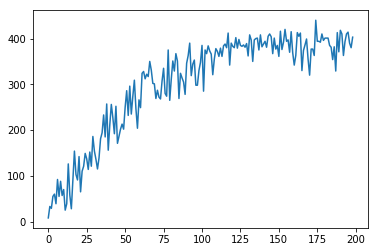

In [46]:
# code for genrating episode
memory = deque(maxlen=2000)
current_state =  (np.random.randint(0, m),np.random.randint(0, t),np.random.randint(0, d))
count  =  0
rewards = []
tot_reward = 0
for epi_len in range(episode_length):
    # pick a random action
    if epi_len % 50 == 0 and epi_len != 0:
        rewards.append(tot_reward)
        tot_reward = 0
    count = count + 1
    index_State = states.index([current_state[0],current_state[1],current_state[2]])
    X = state_trans(current_state,[0,0],m,t,d)
    action = actions[np.int(act(prediction_DQN(m,t,d,actions,X,index_State),epsilon,actions))]
    reward = reward_func(current_state, action, Time_matrix)
    tot_reward += reward
    next_state = next_state_func(current_state, action, Time_matrix, t, d)
    X = state_trans(current_state,action,m,t,d)
    #print("State: ",current_state, " Action: ", action, " Reward: ", reward, " Nextstate: ", next_state)
    index_Next_State = states.index([next_state[0],next_state[1],next_state[2]])
    memory.append((X,reward,index_Next_State))
    current_state = next_state
    if count > batch_size:
        mini_batch = random.sample(memory, batch_size)
        target_mini_batch = np.zeros((batch_size, 1))
        input_mini_batch = np.zeros((batch_size, t+d+3*m))
        for i in range(batch_size):
            X, reward, index_Next_state = mini_batch[i]
            target = reward + gamma*np.amax(prediction_DQN(m,t,d,actions,X,index_Next_State))
            input_mini_batch[i, :] = X
            target_mini_batch[i, :] = target
        model.fit(input_mini_batch,target_mini_batch, epochs = 1, verbose = 0)
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay
    if epi_len % 50 == 0:
        print("Reward:{},Episode:{}, Epsilon:{}".format(reward,epi_len,epsilon))
plt.plot(list(range(len(rewards))), rewards)
plt.show()